In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

books = pd.read_csv("C:\\Users\\sai thapan ragipani\\Desktop\\csv\\krish -projects\\Recommendation System\\Basic Book Recommendation system\\BX-Books.csv",sep=';',error_bad_lines = False,encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
users = pd.read_csv('C:\\Users\\sai thapan ragipani\\Desktop\\csv\\krish -projects\\Recommendation System\\Basic Book Recommendation system\\BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']
ratings = pd.read_csv('C:\\Users\\sai thapan ragipani\\Desktop\\csv\\krish -projects\\Recommendation System\\Basic Book Recommendation system\\BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [144]:
print(ratings.shape)
print(list(ratings.columns))


(1149780, 3)
['userID', 'ISBN', 'bookRating']


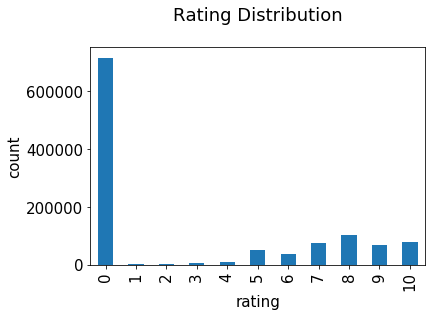

In [145]:
plt.rc("font",size=15)
ratings.bookRating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel("rating")
plt.ylabel('count')
plt.show()

In [146]:
print(books.shape)
print(list(books.columns))

(271360, 8)
['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


In [147]:
print(users.shape)
print(list(users.columns))

(278858, 3)
['userID', 'Location', 'Age']


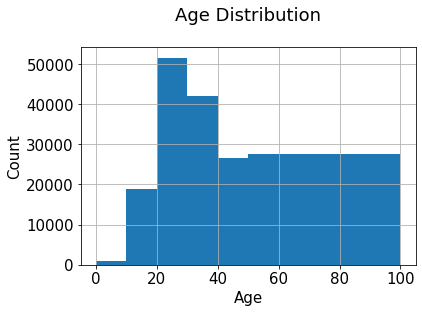

In [148]:
users.Age.hist(bins=[0,10,20,30,40,50,100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Excluding <200 ratings and < 100 book ratings

In [155]:
counts1 = ratings['userID'].value_counts()
ratings = ratings[ratings['userID'].isin(counts1[counts1 >= 200].index)]
counts = ratings['bookRating'].value_counts()
ratings = ratings[ratings['bookRating'].isin(counts[counts >= 100].index)]

# Collaborative Filtering Using K-Nearest Neighbors(KNN)

In [159]:
combine_book_rating = pd.merge(ratings,books,on="ISBN")
columns = ['yearOfPublication', 'publisher', 'bookAuthor', 'imageUrlS', 'imageUrlM', 'imageUrlL']
combine_book_rating = combine_book_rating.drop(columns,axis=1)
combine_book_rating.head()

,userID,ISBN,bookRating,bookTitle
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...


In [163]:
combine_book_rating = combine_book_rating.dropna(axis=0,subset=['bookTitle'])
book_ratingCount = (combine_book_rating.
     groupby(by=['bookTitle'])['bookRating'].
     count().
     reset_index().
     rename(columns={'bookRating':'totalRatingCount'})
     [['bookTitle','totalRatingCount']]
     )
book_ratingCount.head()

,bookTitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [165]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on='bookTitle',  right_on='bookTitle', how ='left')
rating_with_totalRatingCount.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


In [168]:
popularity_threshold = 50
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount>=@popularity_threshold')
rating_popular_book.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


In [170]:
rating_popular_book.shape

(62149, 5)

# Filter to users in US and Canada

In [172]:
combined = rating_popular_book.merge(users,left_on='userID',right_on='userID', how ='left')

us_canada_user_rating = combined[combined['Location'].str.contains("usa|canada")]
us_canada_user_rating = us_canada_user_rating.drop('Age',axis=1)
us_canada_user_rating.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount,Location
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"gilbert, arizona, usa"
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"knoxville, tennessee, usa"
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"byron, minnesota, usa"
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"cordova, tennessee, usa"
5,16795,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"mechanicsville, maryland, usa"


# Applying  the KNN 

In [178]:
from scipy.sparse import csr_matrix
us_canada_user_rating =us_canada_user_rating.drop_duplicates(["userID","bookTitle"])
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index="bookTitle",columns="userID",values="bookRating").fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)


In [182]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [185]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
print(query_index)
distances,indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1,-1),n_neighbors = 6)


254


In [187]:
us_canada_user_rating_pivot.index[query_index]

'High Fidelity'

In [192]:
for i in range(0,len(distances.flatten())):
    if i==0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}:{1},with distance of {2}:'.format(i,us_canada_user_rating_pivot.index[indices.flatten()[i]],distances.flatten()[i]))

Recommendations for High Fidelity:

1:About a Boy,with distance of 0.4815913208393683:
2:How to Be Good,with distance of 0.7339574209251504:
3:Naked,with distance of 0.8107330703174245:
4:Interview with the Vampire,with distance of 0.8256225079704649:
5:Tis : A Memoir,with distance of 0.8271829448953817:
